In [1]:
import tensorflow as tf

In [2]:
a = tf.constant(100)
b = tf.constant(200)

add_op = a+b

sess = tf.Session()

result = sess.run(add_op)
print(result)

300


In [3]:
a = "  asd fff   ";

print(a)

  asd fff   


In [4]:
print(a.strip())

asd fff


In [24]:


#newFile = open("./myText.txt", 'w') # just write from new
newFile = open("./myText.txt", 'a') # add 
newFile.write('%s %s' % ('it\'s', 'just'))
newFile.write("\n ok next line.\n")
newFile.close()

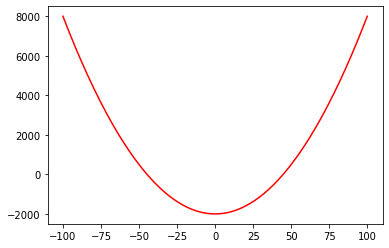

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [ a for a in range(-100, 101) ]
y = [ ( a**2 ) - 2000 for a in x ]

gab,=plt.plot(x, y, 'r-')
plt.show()

In [ ]:
import os
import config as conf

contentsSize = 7

magazinePath = os.path.join(conf.data_root, 'magazine.json')
metadataPath = os.path.join(conf.data_root, 'metadata.json')
usersPath = os.path.join(conf.data_root, 'users.json')

contentsPath = [ os.path.join(conf.data_root, 'contents/data.' + str(i) ) for i in range(0, contentsSize) ]

print(magazinePath)
print(metadataPath)
print(usersPath)
print(contentsPath)


import json
outputFolder = './tmp'

In [4]:
'''

import json

## json 형식 변환
## json_data = json.JSONEncoder().encode(data)

## 딕셔너리 형태로 복구
## data = json.JSONDecoder().decode(json_data)

contents = [ open(contentsPath[i], 'r') for i in range(0, contentsSize) ]


    # each file line counts
    100000
    100000
    100000
    100000
    100000
    100000
    42190


# 단어 카운트
# words = {}
# 메모리 부족으로 일단 나눠서 저장

outputFolder = './tmp'


MAX_LINE = 1
l = 0;

for i in range(0, contentsSize) :
    
    wordsPath = os.path.join(outputFolder, 'words' + str(i) + '.txt')
    wordsFile = open(wordsPath, 'w')
    
    words = {}
    
    for jsonLine in contents[i] :
        # ============= for test
        # if l >= MAX_LINE : break
        # l = l + 1
        # ============= for test
        
        # convert json to dictionary
        line = json.JSONDecoder().decode(jsonLine)

        # { "chars": [[]], "morphs": , "id" }
        # print(line['id'])
        # print(line['morphs'])
        for morphs in line['morphs'] :
            for morph in morphs :
                words[morph] = words.get(morph, 0) + 1
                
    wordsFile.write(json.JSONEncoder().encode(words))    
    wordsFile.close()
    contents[i].close()

'''

In [16]:
'''
    저장한 words0.txt ~ words1.txt 를 순회하며
    { 'word1' : count, 'word2' : count, ... } 를 생성 및 저장 -> wordsAll.txt
'''


allDic = {}

for i in range(0, contentsSize) :
    # if i != targetIdx : continue
    
    wordsFile = open(os.path.join(outputFolder, 'words' + str(i) + '.txt'), 'r')
                                        
    temp_a = json.JSONDecoder().decode(wordsFile.read())
    if i == 0 : allDic = temp_a 
    else : 
        for k, v in temp_a.items() :
            allDic[k] = allDic.get(k, 0) + int(v)
    
    wordsFile.close()
    
print(len(allDic))

wordsFile = open(os.path.join(outputFolder, 'wordsAll.txt'), 'w')
wordsFile.write(json.JSONEncoder().encode(allDic))
wordsFile.close()
    



1946890


In [2]:
wordsAll = {}

with open(os.path.join(outputFolder, 'wordsAll.txt'), 'r') as fall :
    wordsAll = json.JSONDecoder().decode(fall.read())

wordsAll = [ (k, v) for k, v in wordsAll.items() ]

wordsAll.sort(key=lambda x:x[1], reverse=True)
print(wordsAll[:10])


[('14/SF', 24685127), ('40/JKO', 14486891), ('32/ETM', 14063634), ('9/XSV', 13597329), ('12/VCP', 12774204), ('13/EF', 11893461), ('38/JKG', 11538859), ('5/ETM', 11372307), ('30/JKB', 10506307), ('24/SP', 10293510)]


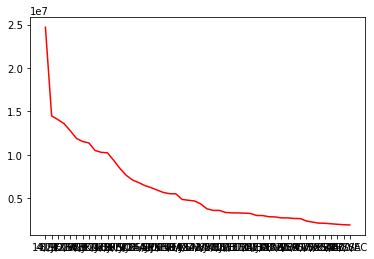

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

top50w = wordsAll[:50]
x = [ k for k, _ in top50w ]
y = [ v for _, v in top50w ]

gab,=plt.plot(x, y, 'r-')
plt.show()

In [ ]:
# doc2vec

from gensim.models import doc2vec
from collections import namedtuple

import json

## json 형식 변환
## json_data = json.JSONEncoder().encode(data)

## 딕셔너리 형태로 복구
## data = json.JSONDecoder().decode(json_data)

contents = [ open(contentsPath[i], 'r') for i in range(0, contentsSize) ]


    # each file line counts
#    100000
#    100000
#    100000
#    100000
#    100000
#    100000
#    42190

outputFolder = './tmp'


targetIndex = 0;
for i in range(0, contentsSize) :
    if targetIndex != i : continue
    
    wordsPath = os.path.join(outputFolder, 'vec' + str(i) + '.txt')
    wordsFile = open(wordsPath, 'w')
    
    tagged_train_docs = []
    for jsonLine in contents[i] :
        
        # convert json to dictionary
        line = json.JSONDecoder().decode(jsonLine)

        # { "chars": [[]], "morphs": , "id" }
        # print(line['id'])
        # print(line['morphs'])
        docId = line['id']
        TaggedDocument = namedtuple('TaggedDocument', 'words tags')
        
        mList = []
        for morphs in line['morphs'] :
            mList.extend(morphs)
        tagged_train_docs.append( TaggedDocument(docId, mList) )
                
            
    contents[i].close()

    print(tagged_train_docs.head())

